# Test of eddy detection functions
### Using the eddies.py functions, to be modified to calculate all eddies in Lebreton data ###

*JASaa*

*ISAE-SUPAERO*

## Load data and import functions

In [1]:
from eddies import eddy_detection,print_eddies,plot_eddies,local_peaks,local_minima3D,find_local_mins

#name of the netCDF data file
filename = 'Lebreton_2015.nc'
# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 1000
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 1
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Run R2 algorithm

In [2]:
%%capture
lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask = eddy_detection(filename,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)

## Print eddy census

In [3]:
print_eddies(eddie_census,nEddies)


Eddie census data

        minOW  circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1   -1.761357 -4775.541925 -136.583328  39.166668  228.0    139.574655
2   -1.073718  2126.090041 -147.833328  41.750000    4.0     20.214201
3   -5.760250  5547.190935 -153.833328  27.250000  139.0    116.715694
4   -2.266156  2711.605298 -141.833328  41.083332   39.0     57.563831
5   -6.296369 -5050.286913 -138.416672  34.666668   43.0     62.930856
6   -1.504729  6510.318077 -152.166672  29.583334   37.0     60.120347
7   -3.354519  4392.009488 -139.833328  34.750000   32.0     54.460339
8   -1.450154  3133.470777 -148.166672  28.916666   52.0     71.391735
9   -2.187413  3551.089951 -139.583328  26.083334   51.0     71.575501
10  -4.072649  3985.943538 -136.250000  41.333332  113.0     96.711366
11  -2.123200  3069.762762 -128.333328  33.666668   77.0     84.234274
12  -3.270871 -3422.253353 -145.416672  38.333332   20.0     42.487909
13  -3.282930 -4501.382705 -155.666672  25.916666   75.0 

## Plot velocities and eddies

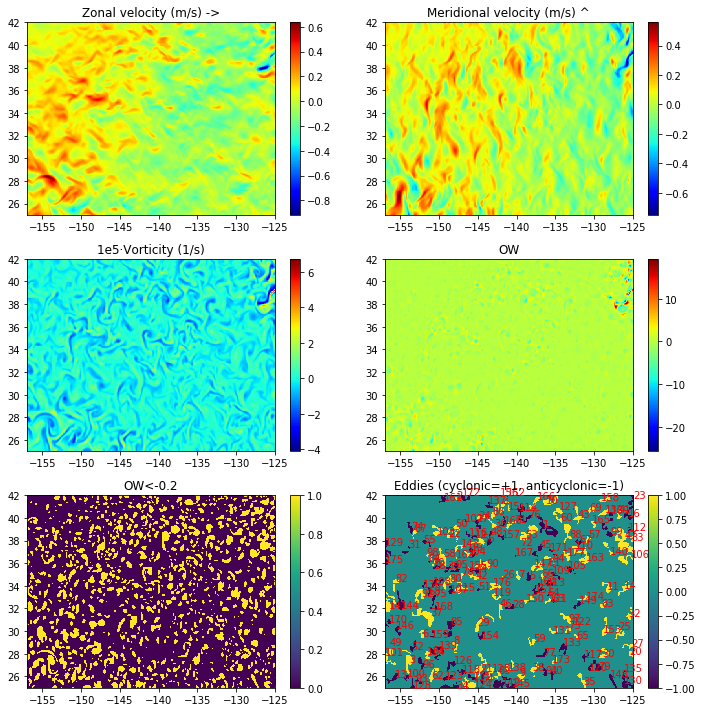

In [4]:
%matplotlib inline
plot_eddies(lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask,k_plot)

### Difference in time to calculate minima
The *local_peaks* takes much less time than the *find_local_mins* and takes into account the edges, which *local_minima3D* doesn't. It also finds more minima.

In [5]:
%%time
local_peaks(OW,OW_start,max_evaluation_points).shape

Wall time: 3.96 ms


(3, 1000)

In [6]:
%%time
local_minima3D(OW,OW_start,max_evaluation_points)[1].shape

Wall time: 2.01 ms


(3, 536)

In [7]:
%%time
find_local_mins(OW,OW_start,max_evaluation_points).shape

Wall time: 1.84 s


(3, 427)

### Difference in number of eddies found
The algorithm was run with the three minima funtions, can vary a little for the peaks and minima3D because of the use of random sampling.
#difference in eddies found for max_evaluation_points=1000

peaks = 179

minima3D = 178

local_mins = 220